In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
path =  'myData'
labelFile = 'labels.csv'
batch_size_val = 50
steps_per_epoch_val = 2000
epochs_val = 30
imageDimensions = (32,32,3)
testRatio = 0.2
validationRatio = 0.2

In [5]:
count=0
images=[]
classNo=[]
myList = os.listdir(path)
print('Total Classes Detected:',len(myList))
noOfClasses = len(myList)
print('Importing classes...')
for x in range(0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count,end=' ')
    count+=1
print(' ')
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing classes...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [6]:
x_train,x_test,y_train,y_test = train_test_split(images,classNo,test_size=testRatio)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=validationRatio)

In [7]:
print('Data shapes')
print('Train',end='');print(x_train.shape,y_train.shape)
print('validation',end='');print(x_val.shape,y_val.shape)
print('Test',end='');print(x_test.shape,y_test.shape)
assert(x_train.shape[0]==y_train.shape[0]), "the no. of images is not equal to no. of label in training set"
assert(x_val.shape[0]==y_val.shape[0]), "the no. of images is not equal to no. of label in validation set"
assert(x_test.shape[0]==y_test.shape[0]), "the no. of images is not equal to no. of label in test set"
assert(x_train.shape[1:]==(imageDimensions)), 'the dimension of training image are wrong'
assert(x_val.shape[1:]==(imageDimensions)), 'the dimension of validation image are wrong'
assert(x_test.shape[1:]==(imageDimensions)), 'the dimension of test image are wrong'

Data shapes
Train(22271, 32, 32, 3) (22271,)
validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [8]:
data = pd.read_csv(labelFile)
print('data shape',data.shape,type(data))

data shape (43, 2) <class 'pandas.core.frame.DataFrame'>


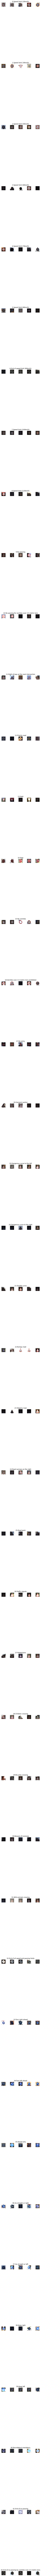

In [9]:
num_of_samples = []
cols=5
num_classes = noOfClasses
fig,axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = x_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')
        if i==2:
            axs[j][i].set_title(str(j)+'-'+row['Name'])
            num_of_samples.append(len(x_selected))

[121, 1307, 1315, 817, 1115, 1041, 234, 827, 814, 833, 1154, 758, 1239, 1281, 438, 340, 224, 620, 677, 109, 191, 172, 212, 274, 158, 873, 338, 129, 293, 147, 264, 438, 137, 377, 221, 699, 209, 103, 1137, 182, 184, 132, 137]


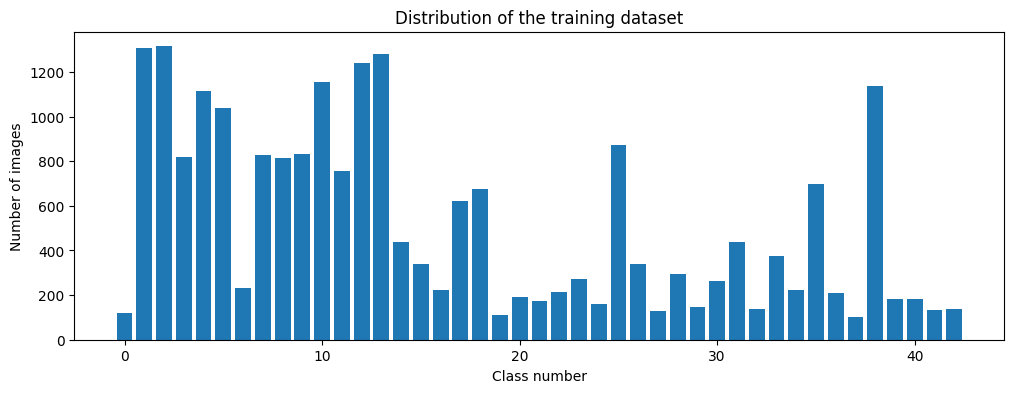

In [10]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')
plt.show()

In [11]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [ ]:
x_train = np.array(list(map(preprocess,x_train)))
x_validation = np.array(list(map(preprocess,x_val)))
x_test = np.array(list(map(preprocess,x_test)))

In [16]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_validation = x_validation.reshape(x_validation.shape[0],x_validation.shape[1],x_validation.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [17]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10
)

In [18]:
datagen.fit(x_train)
batches = datagen.flow(x_train,y_train,batch_size=20)
x_batch,y_batch = next(batches)

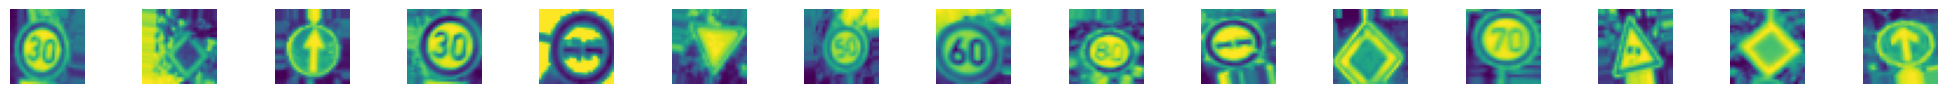

In [19]:
fig,axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(x_batch[i].reshape(imageDimensions[0],imageDimensions[1]))
    axs[i].axis('off')
plt.show()

In [20]:
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_val,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [32]:
def myModel():
    no_of_filters=60
    size_of_filter=(5,5)

    size_of_filter2=(3,3)
    size_of_pool=(2,2)
    no_of_nodes=500

    model = Sequential()
    model.add(Conv2D(no_of_filters,size_of_filter,input_shape=(imageDimensions[0],imageDimensions[1],1),activation='relu'))
    model.add(Conv2D(no_of_filters,size_of_filter,activation='relu'))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    model.add(Conv2D(no_of_filters//2,size_of_filter2,activation='relu'))
    model.add(Conv2D(no_of_filters//2,size_of_filter2,activation='relu'))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_of_nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))


    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [33]:
model=myModel()
print(model.summary())

d:\computer vision project\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(x_validation,y_validation),shuffle=1)

d:\computer vision project\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 446/2000 ━━━━━━━━━━━━━━━━━━━━ 1:24 54ms/step - accuracy: 0.1714 - loss: 3.0602

d:\computer vision project\env\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.2902 - loss: 2.5400 - val_accuracy: 0.7320 - val_loss: 0.7920
Epoch 2/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.6457 - loss: 1.1299 - val_accuracy: 0.9018 - val_loss: 0.3099
Epoch 3/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7621 - loss: 0.7581 - val_accuracy: 0.9592 - val_loss: 0.1644
Epoch 4/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8164 - loss: 0.5775 - val_accuracy: 0.9673 - val_loss: 0.1268
Epoch 5/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.8564 - loss: 0.4559 - val_accuracy: 0.9605 - val_loss: 0.1284
Epoch 6/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.8736 - loss: 0.4015 - val_accuracy: 0.9759 - val_loss: 0.0733
Epoch 7/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8925 - loss: 0.3401 - val_accuracy: 0.9858 - val_loss: 0.0529
Epoch 8/30
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9019 - loss: 0.31

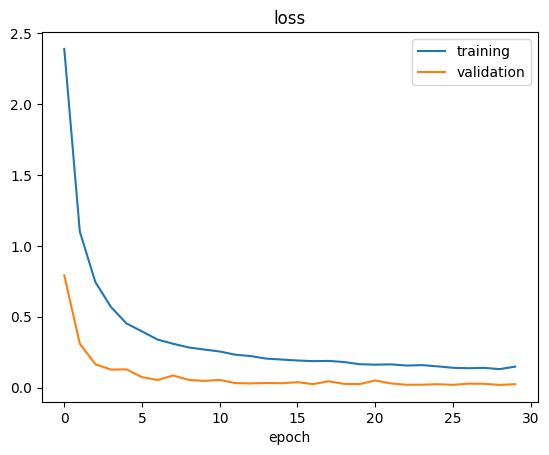

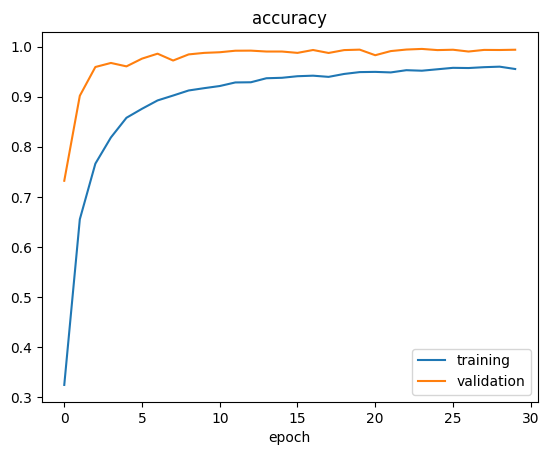

In [35]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.show()

In [36]:
score = model.evaluate(x_test,y_test,verbose=0)
print(f'Test loss:{score[0]}')
print(f'Test accuracy:{score[1]}')

Test loss:0.01927991397678852
Test accuracy:0.9954022765159607


In [ ]:
pickle_out=open('model_trained.p','wb')
pickle.dump(model,pickle_out)
pickle_out.close()

: 